# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for classifying qwerties
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

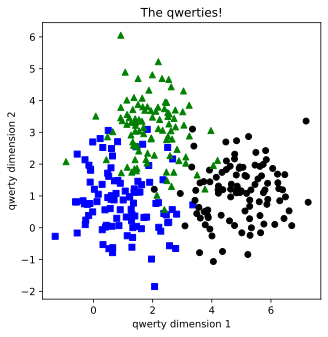

In [2]:
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]
C = [2,3]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack( (np.zeros((nPerClust,1)),np.ones((nPerClust,1)), 1+np.ones((nPerClust,1)) ))

data_np = np.hstack((a,b,c)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long().squeeze(1)

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'g^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [3]:
ANNclassify = nn.Sequential(
    nn.Linear(2,8),
    nn.ReLU(),
    nn.Linear(8,3),
    nn.Softmax(dim=1),
      )

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=3, bias=True)
  (3): Softmax(dim=1)
)

In [4]:
learningRate = .01

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

In [ ]:
epochs = 5000
losses = torch.zeros(epochs)
acc = []

for epoch in range(epochs):

  yHat = ANNclassify(data)

  loss = loss_fn(yHat,labels)
  losses[epoch] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  match = torch.argmax(yHat, axis=1) == labels
  accuracyPct = 100*torch.mean(match.float())
  acc.append( accuracyPct ) 
    

In [ ]:

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(acc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()